In [1]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.173 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6407.3/8062.4 GB disk)


In [3]:
with open("/kaggle/input/final-ds-reduced-classes/Final_merged_dataset-yaml_cls_reduced_classes/Final_merged_dataset/data.yaml") as f:
    contents = f.read()
    print(contents)

train: train/images
val: valid/images
test: test/images

names:
  0: Air conditioner
  1: Air purifier
  2: Bowl
  3: Broom
  4: Brush
  5: Cup
  6: Cutlery_container
  7: Dustpan
  8: Egg beater
  9: Blender
  10: Juicer
  11: Electric Shaver
  12: Electric brush
  13: Electric rice cooker
  14: Fork
  15: Gas Stove
  16: Gas-cylinder
  17: Hair dryer
  18: Induction stove
  19: Iron Box
  20: Knife
  21: Massage chair
  22: Microwave
  23: Mug
  24: Oven
  25: Pressure cooker
  26: Shampoo
  27: Soap
  28: Spoon
  29: Toothbrush
  30: Toothpaste
  31: Uncleaned Object
  32: Vacuum cleaner
  33: Washing machine
  34: Water dispenser
  35: Water purifier
  36: Wi‑Fi device
  37: bathtub‐clean
  38: bottle
  39: cabinet
  40: carpet
  41: clock
  42: closet‐clean
  43: coffee bottle
  44: dish cloth
  45: dishwasher
  46: door
  47: drawer
  48: drinks shelf
  49: geyser‐clean
  50: glass jar
  51: kettle
  52: kitchen sink
  53: light
  54: mirror‐clean
  55: outlet
  56: pan
  57: pap

In [4]:
import os

# Define paths
base_dir = "/kaggle/working/Final_merged_dataset"
yaml_path = os.path.join(base_dir, "data.yaml")

# Create the directory
os.makedirs(base_dir, exist_ok=True)

# YAML content
yaml_text = """
train: /kaggle/input/final-ds-reduced-classes/Final_merged_dataset-yaml_cls_reduced_classes/Final_merged_dataset/train/images
val: /kaggle/input/final-ds-reduced-classes/Final_merged_dataset-yaml_cls_reduced_classes/Final_merged_dataset/valid/images
test: /kaggle/input/final-ds-reduced-classes/Final_merged_dataset-yaml_cls_reduced_classes/Final_merged_dataset/test/images

names: 
  0: Air conditioner
  1: Air purifier
  2: Bowl
  3: Broom
  4: Brush
  5: Cup
  6: Cutlery_container
  7: Dustpan
  8: Egg beater
  9: Blender
  10: Juicer
  11: Electric Shaver
  12: Electric brush
  13: Electric rice cooker
  14: Fork
  15: Gas Stove
  16: Gas-cylinder
  17: Hair dryer
  18: Induction stove
  19: Iron Box
  20: Knife
  21: Massage chair
  22: Microwave
  23: Mug
  24: Oven
  25: Pressure cooker
  26: Shampoo
  27: Soap
  28: Spoon
  29: Toothbrush
  30: Toothpaste
  31: Uncleaned Object
  32: Vacuum cleaner
  33: Washing machine
  34: Water dispenser
  35: Water purifier
  36: Wi‑Fi device
  37: bathtub‐clean
  38: bottle
  39: cabinet
  40: carpet
  41: clock
  42: closet‐clean
  43: coffee bottle
  44: dish cloth
  45: dishwasher
  46: door
  47: drawer
  48: drinks shelf
  49: geyser‐clean
  50: glass jar
  51: kettle
  52: kitchen sink
  53: light
  54: mirror‐clean
  55: outlet
  56: pan
  57: paper towel
  58: plastic bag
  59: plate
  60: pot
  61: refrigerator
  62: sandwich grill
  63: showerhead‐clean
  64: sink‐clean
  65: stains
  66: sugar bowl
  67: toilet‐clean
  68: towel‐clean
  69: trash bin
  70: washbasin‐clean
  71: western-toilet-clean
  72: water filter
  73: rusty pipes
  74: cleaned floor/tiles
  75: uncleaned floor/tiles
  76: uncleaned toilet

"""

# Write the YAML file
with open(yaml_path, 'w') as file:
    file.write(yaml_text)

print(f"File saved at {yaml_path}")

File saved at /kaggle/working/Final_merged_dataset/data.yaml


In [5]:
!yolo task=detect mode=train model=yolov8s.pt data=/kaggle/working/Final_merged_dataset/data.yaml epochs=150 imgsz=640 plots=true patience=35

Ultralytics 8.3.173 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Final_merged_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=35, perspective=0.0, plots=True, pos

In [6]:
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
from google.oauth2 import service_account

# Authenticate with Google Drive API
SCOPES = ['https://www.googleapis.com/auth/drive.file']
SERVICE_ACCOUNT_FILE = '/kaggle/input/gcp-json/gen-lang-client-0691548897-b7848e8949b8.json'

creds = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
drive_service = build('drive', 'v3', credentials=creds)

def upload_to_drive(file_path):
    file_name = file_path.split("/")[-1]
    file_metadata = {'name': file_name}
    media = MediaFileUpload(file_path, resumable=True)

    file = drive_service.files().create(body=file_metadata, media_body=media, fields="id").execute()
    file_id = file.get("id")

    # Make file public
    drive_service.permissions().create(
        fileId=file_id,
        body={"role": "reader", "type": "anyone"},
    ).execute()

    print(f"✅ Uploaded {file_name} to Google Drive: https://drive.google.com/file/d/{file_id}/view")

# Upload both models
upload_to_drive("/kaggle/working/runs/detect/train/weights/best.pt")
upload_to_drive("/kaggle/working/runs/detect/train/weights/last.pt")

✅ Uploaded best.pt to Google Drive: https://drive.google.com/file/d/1FCVPKhi3OC8lJzDBBgXNdTd6MV2kysEL/view
✅ Uploaded last.pt to Google Drive: https://drive.google.com/file/d/1l1dG9SyI5EC1IY0ZxlQeKePyX7LiTJYE/view


In [7]:
import matplotlib.pyplot as plt

In [8]:
import os
path = "/kaggle/working/runs/detect/train/"
print(os.listdir(path))


['train_batch2.jpg', 'val_batch2_pred.jpg', 'results.csv', 'train_batch1.jpg', 'labels.jpg', 'val_batch2_labels.jpg', 'BoxPR_curve.png', 'confusion_matrix_normalized.png', 'train_batch68320.jpg', 'train_batch68321.jpg', 'BoxR_curve.png', 'val_batch0_pred.jpg', 'results.png', 'args.yaml', 'val_batch0_labels.jpg', 'confusion_matrix.png', 'val_batch1_pred.jpg', 'train_batch0.jpg', 'BoxF1_curve.png', 'BoxP_curve.png', 'train_batch68322.jpg', 'val_batch1_labels.jpg', 'weights', 'labels_correlogram.jpg']


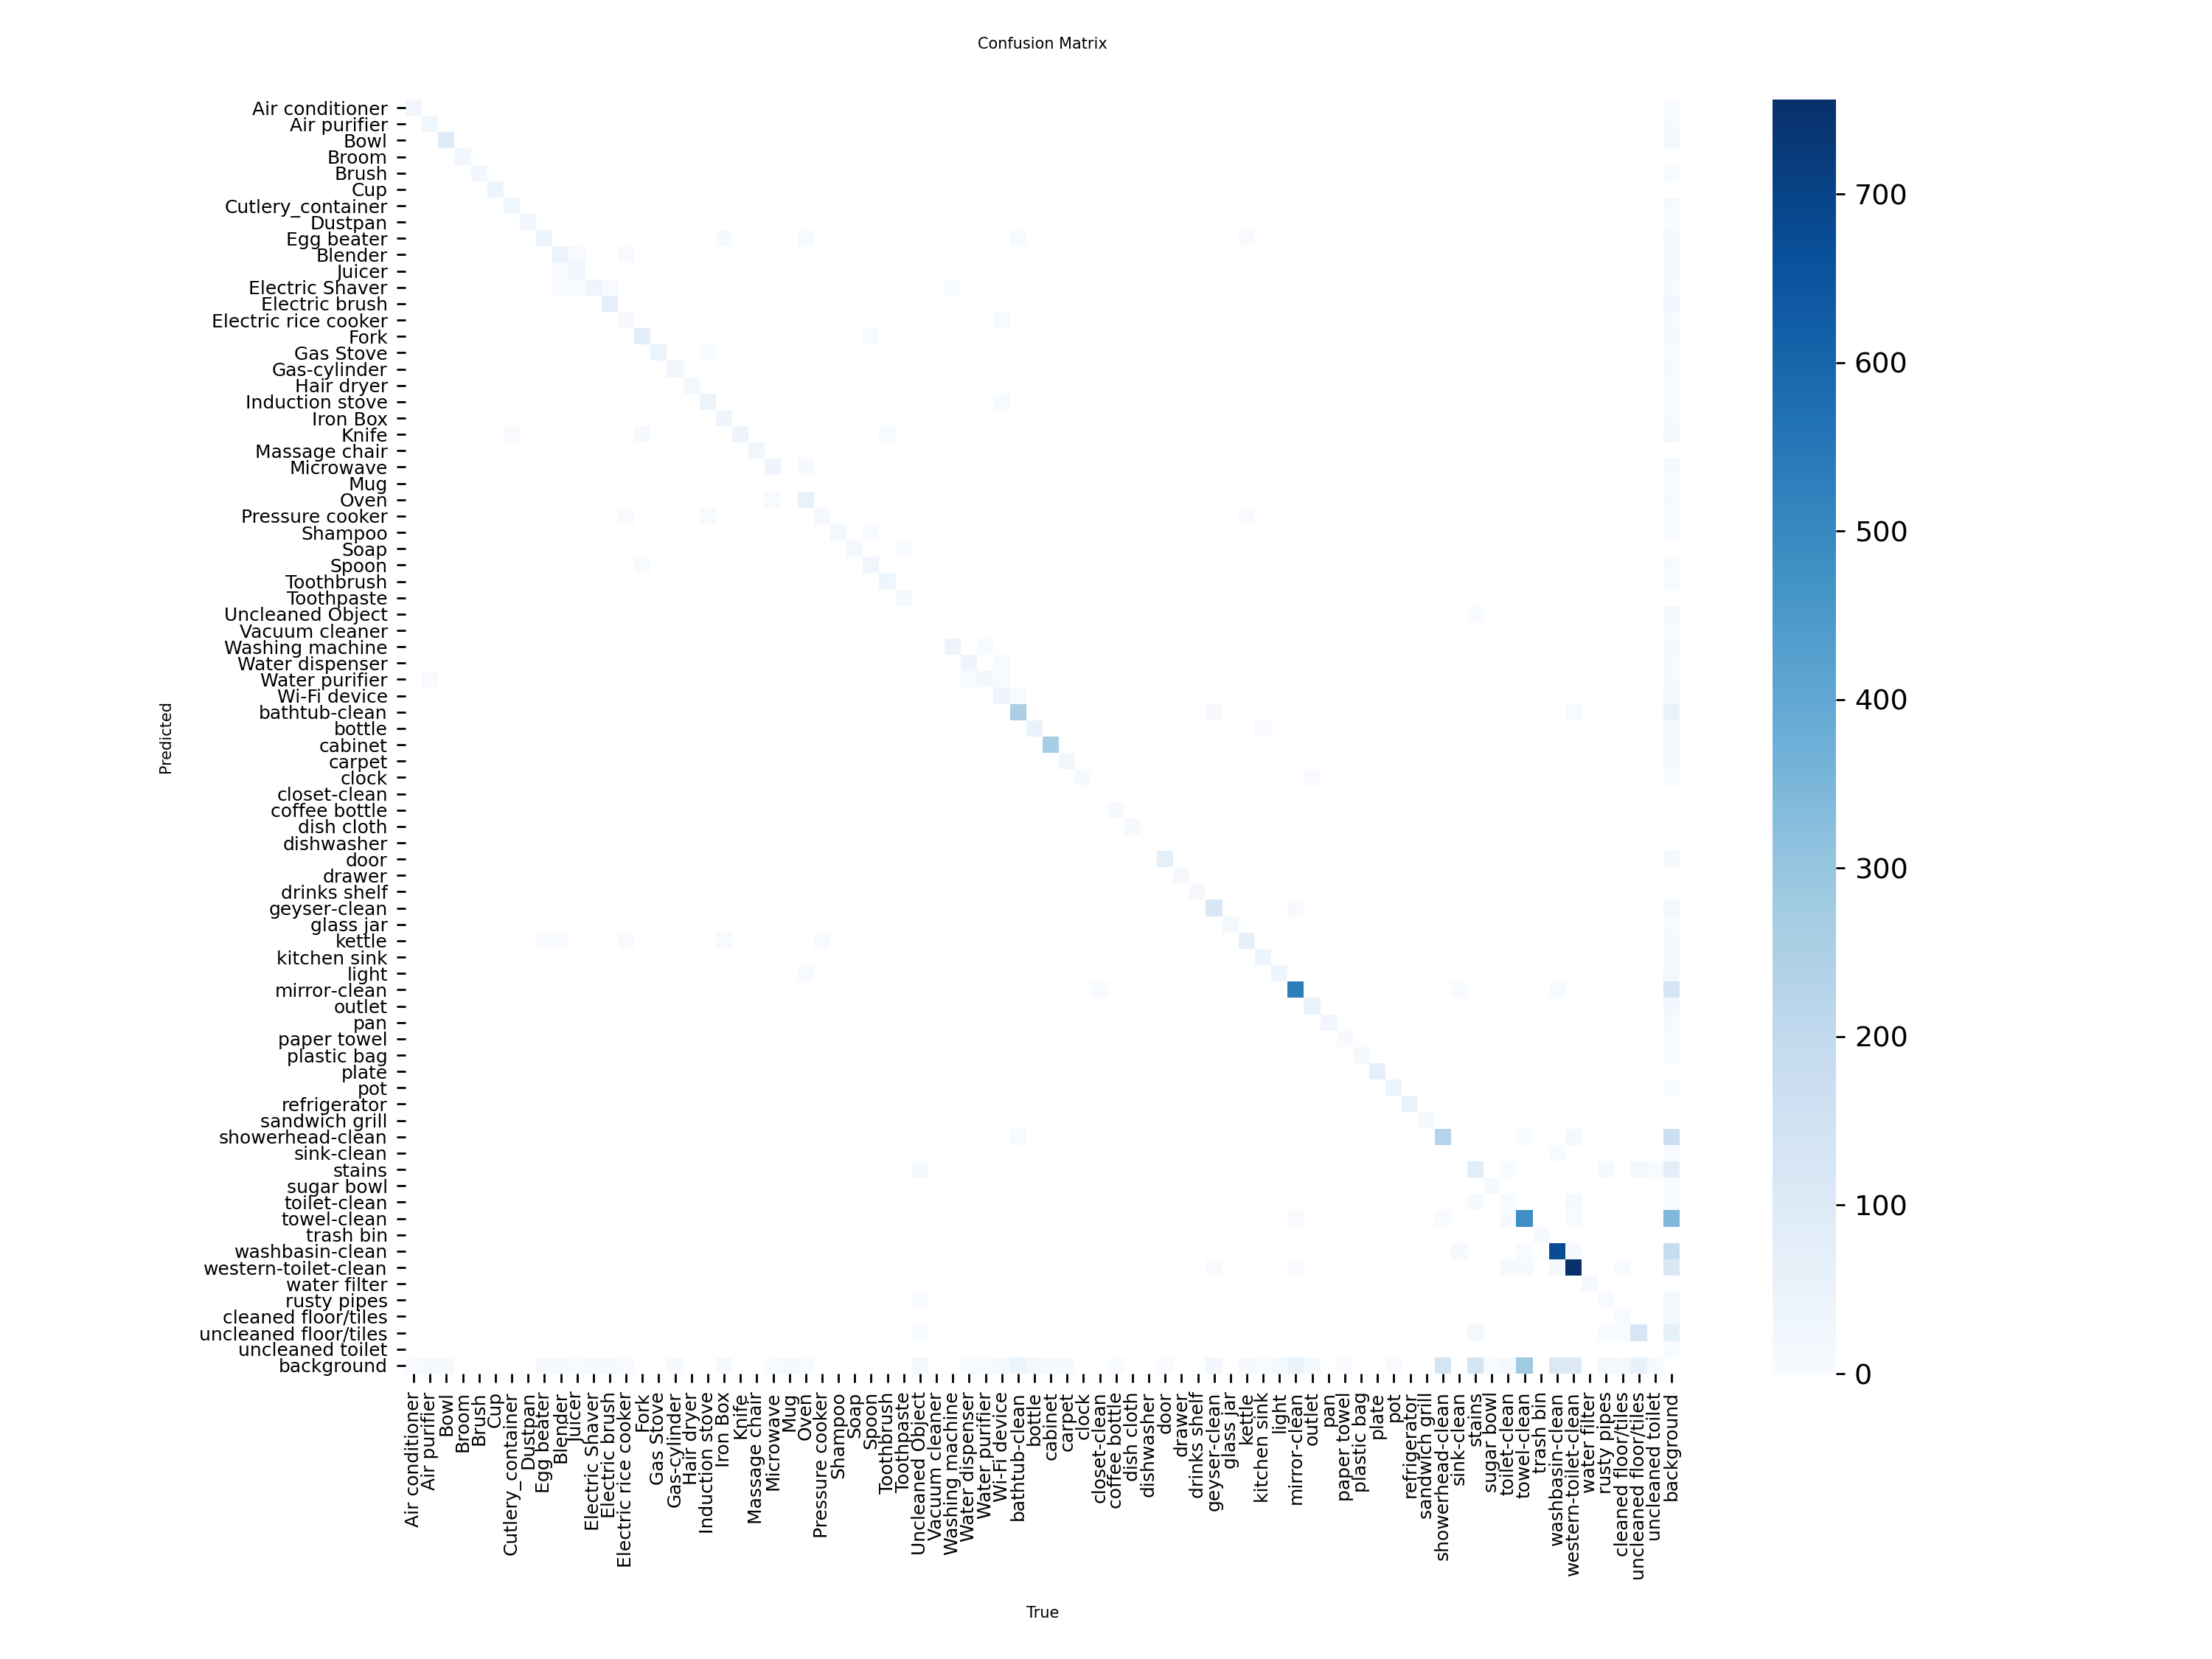

In [9]:
Image(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png',width=1000)

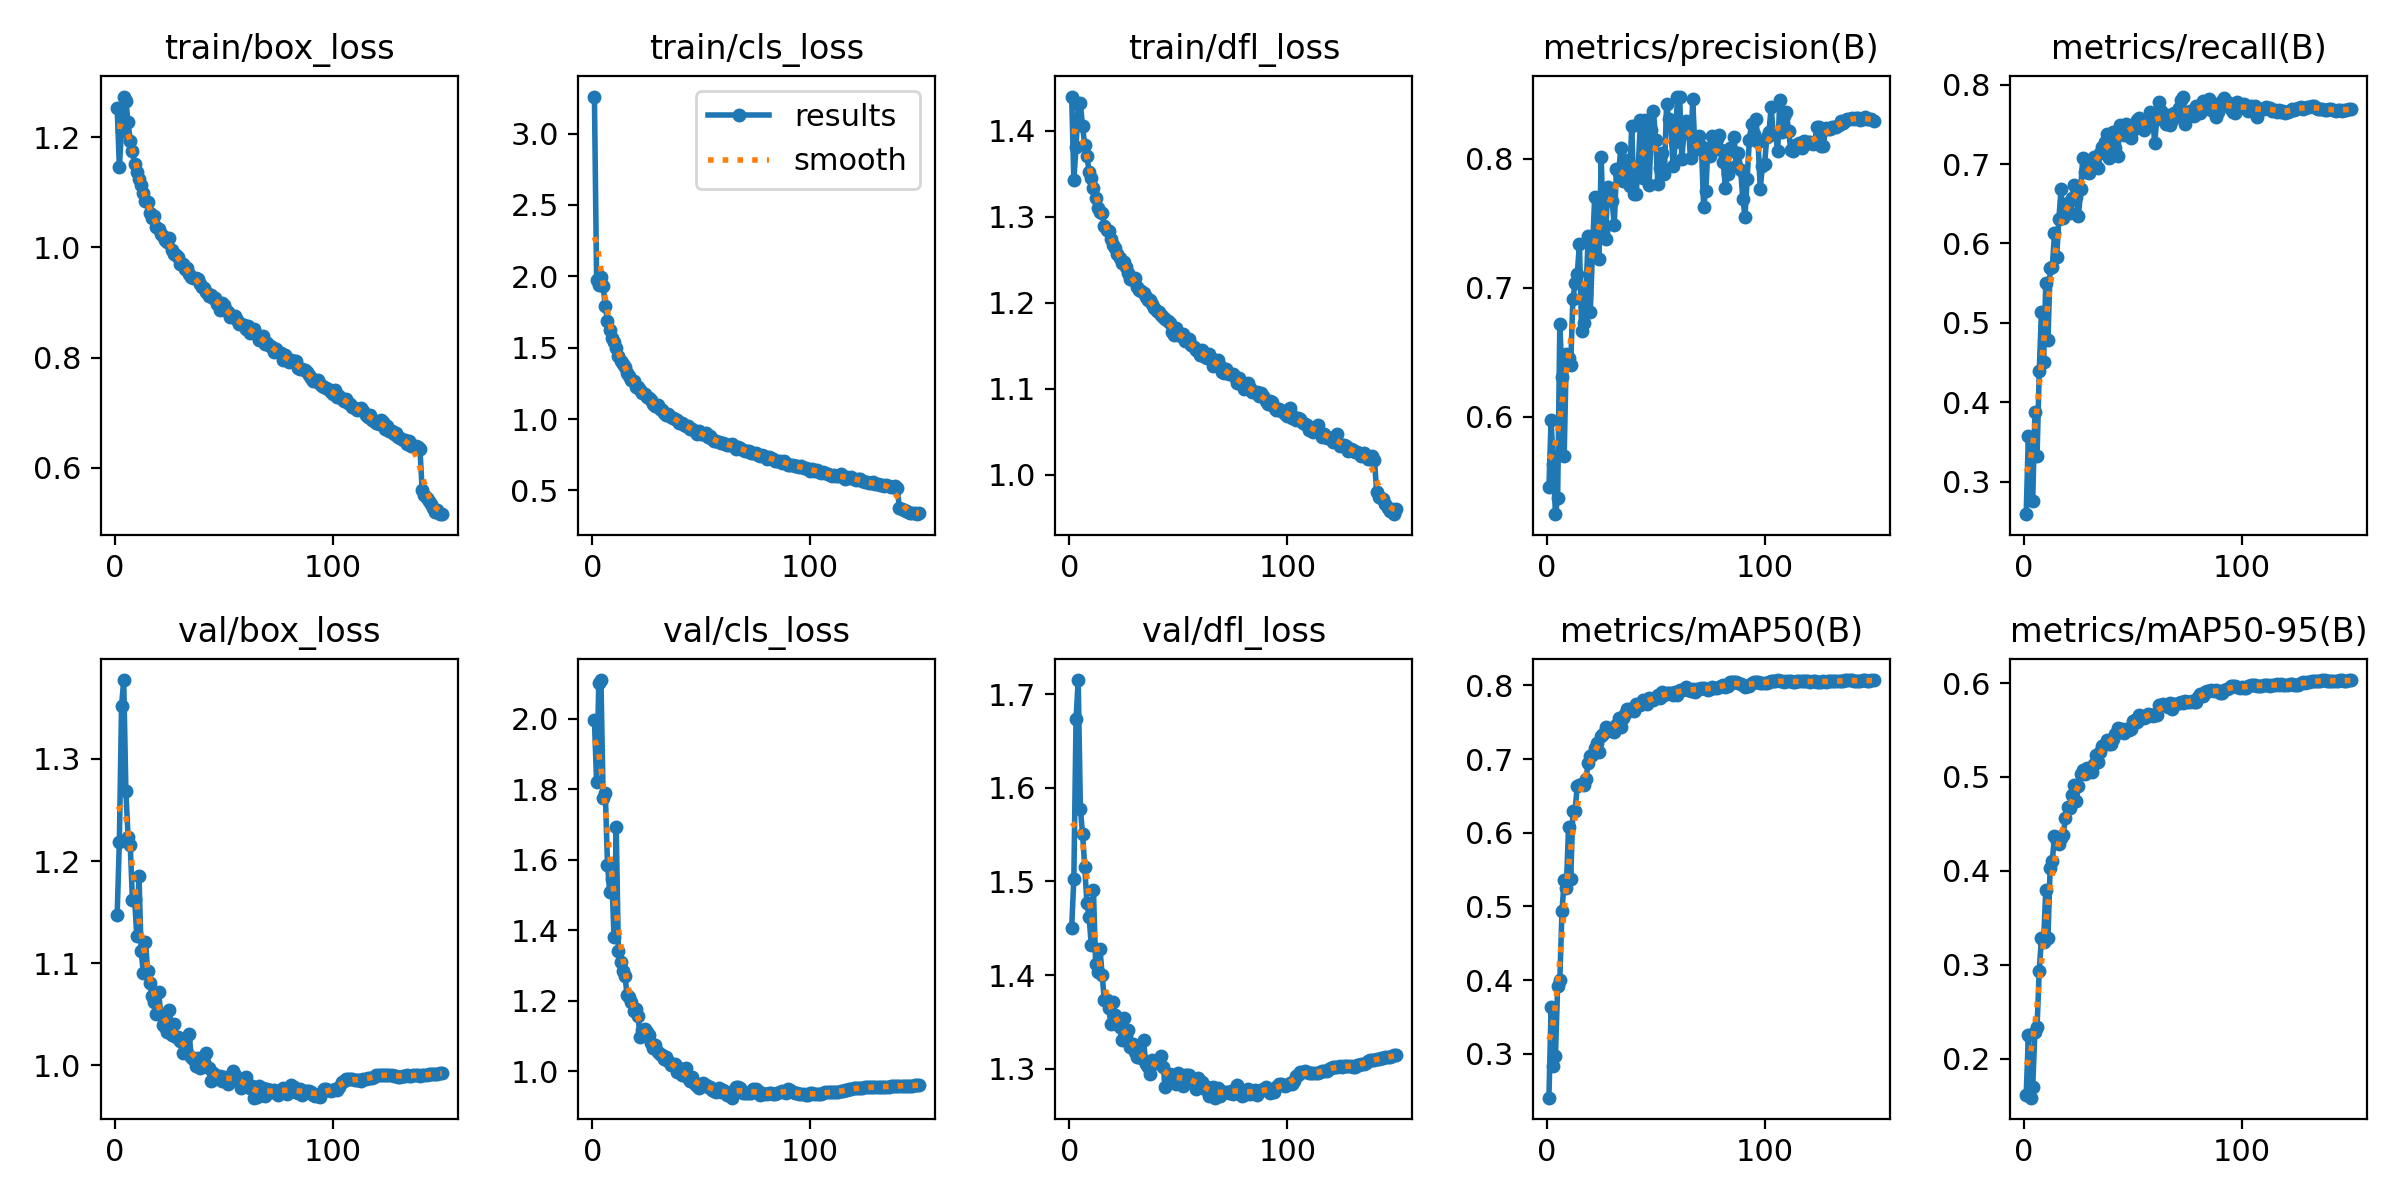

In [10]:
Image(filename=f'/kaggle/working/runs/detect/train/results.png',width=1000)

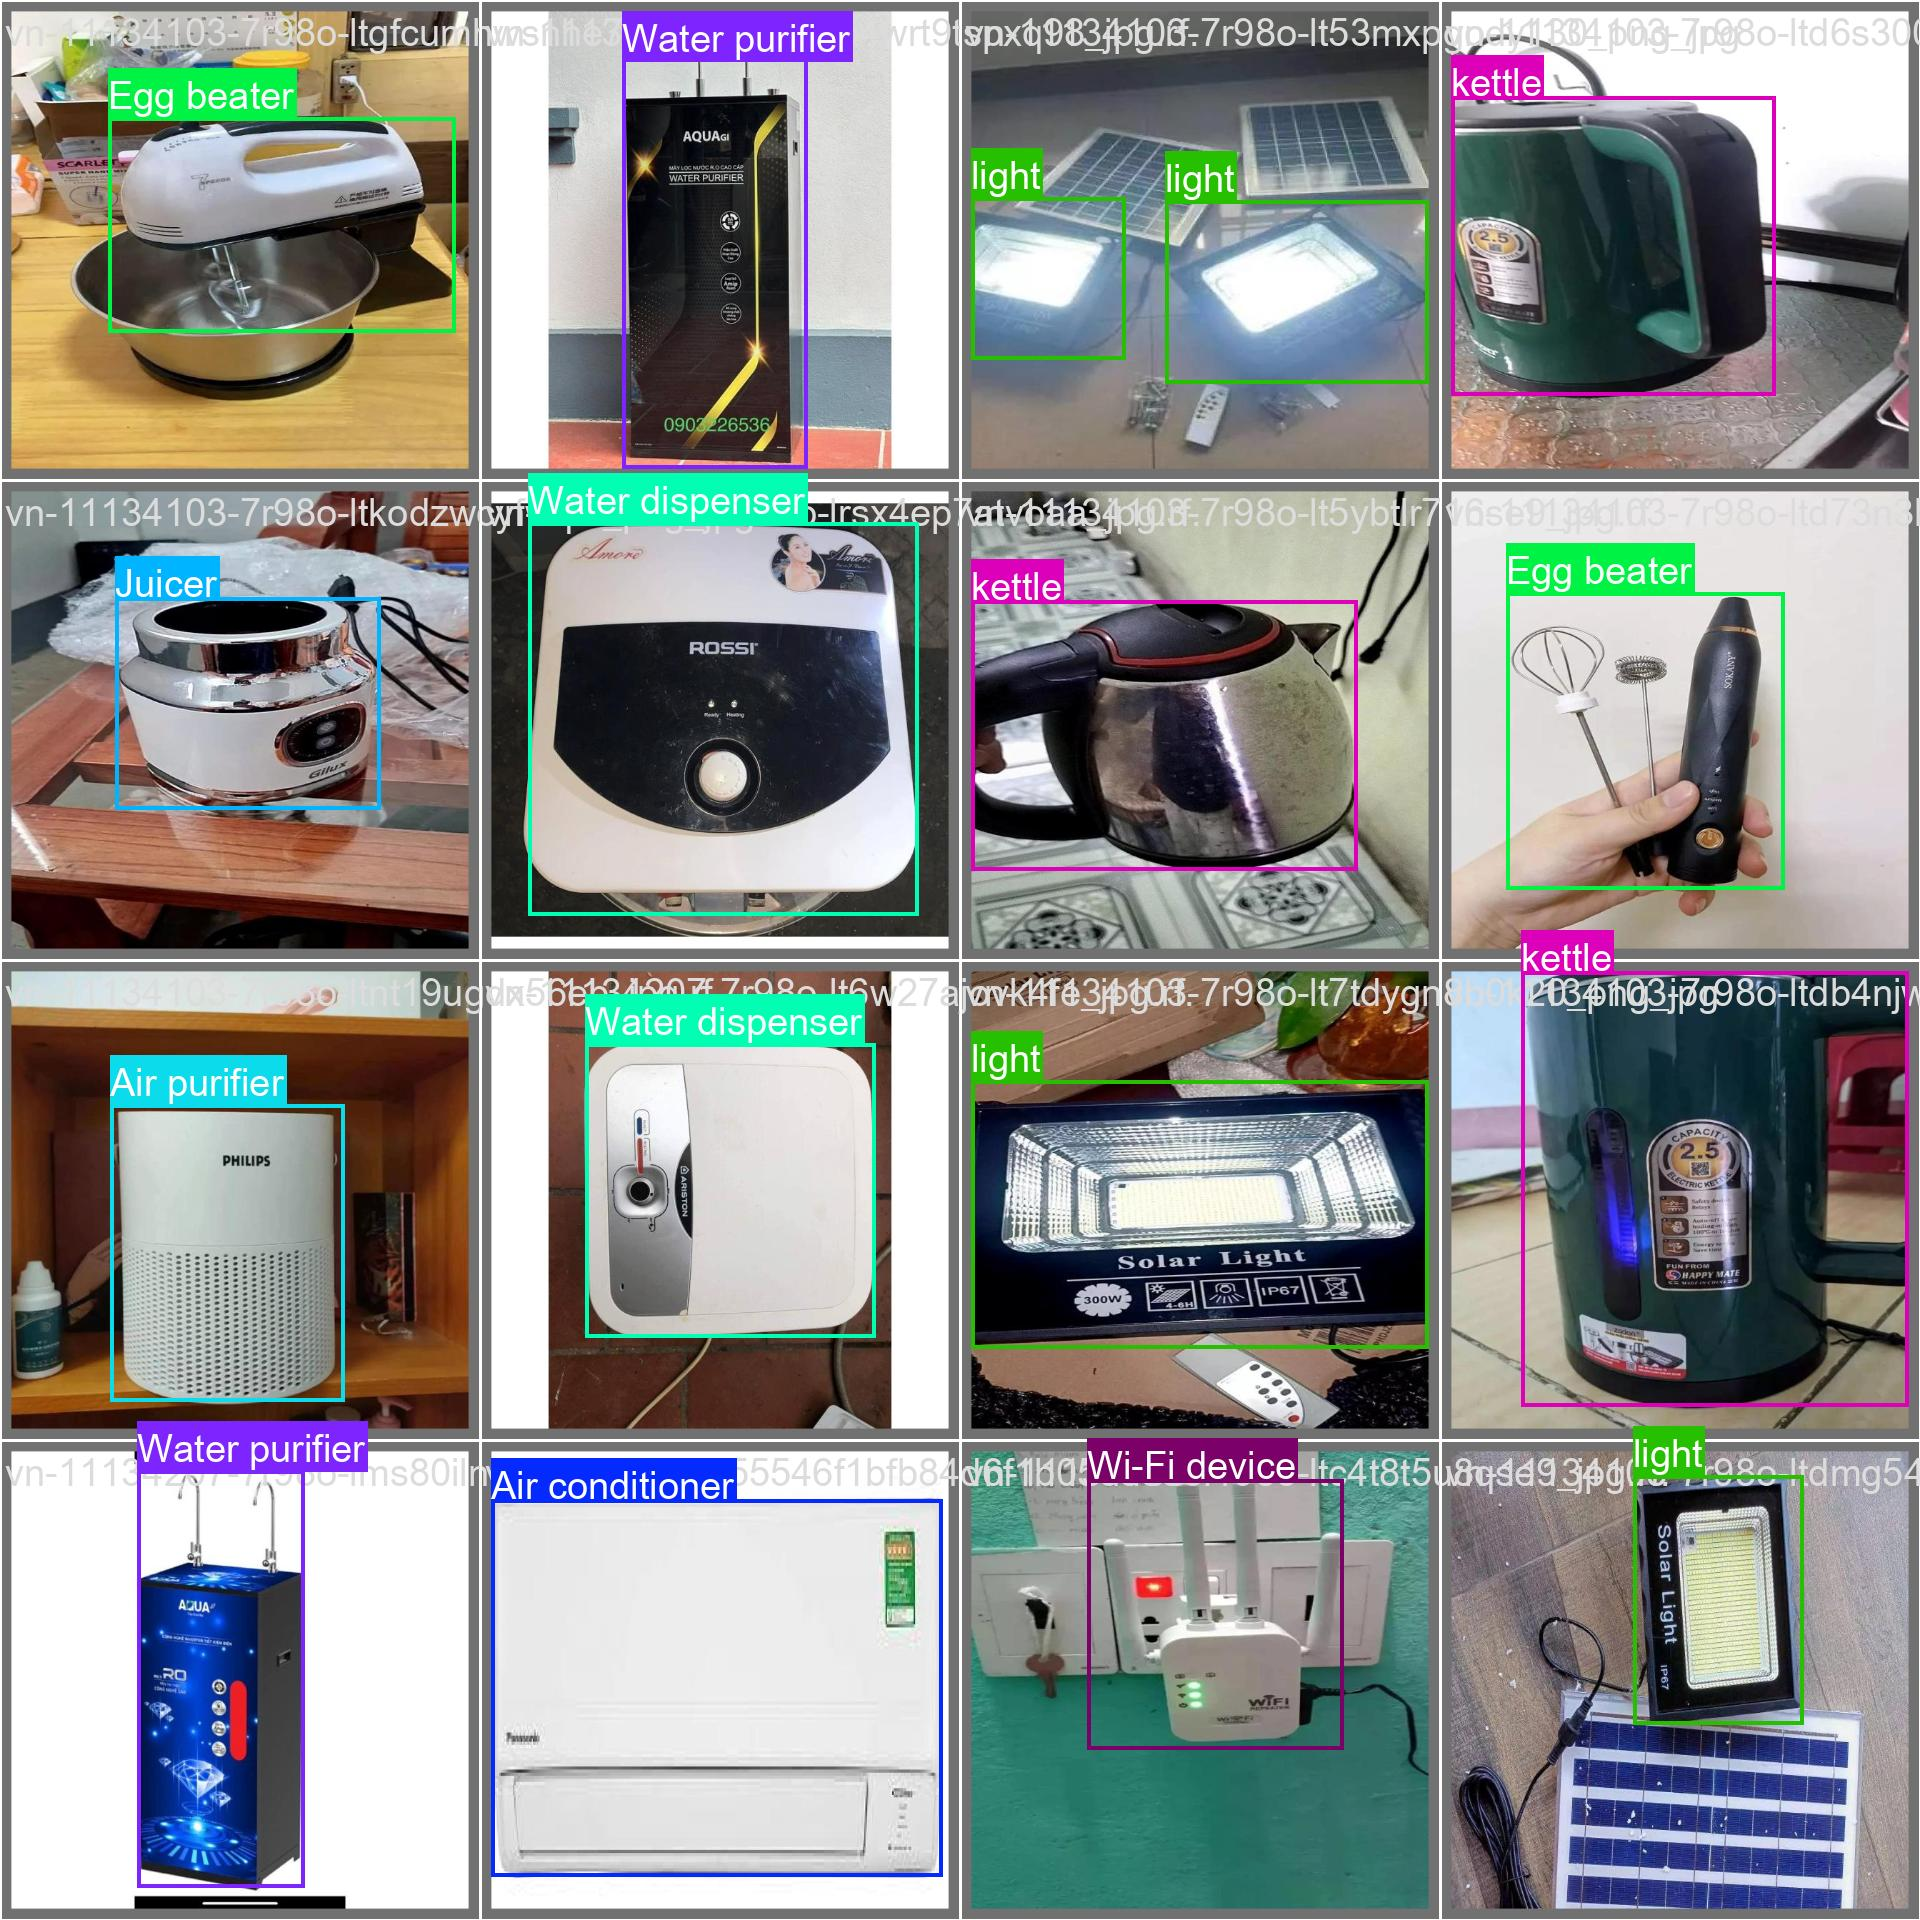

In [11]:
Image(filename=f'/kaggle/working/runs/detect/train/val_batch0_labels.jpg',width=1000)

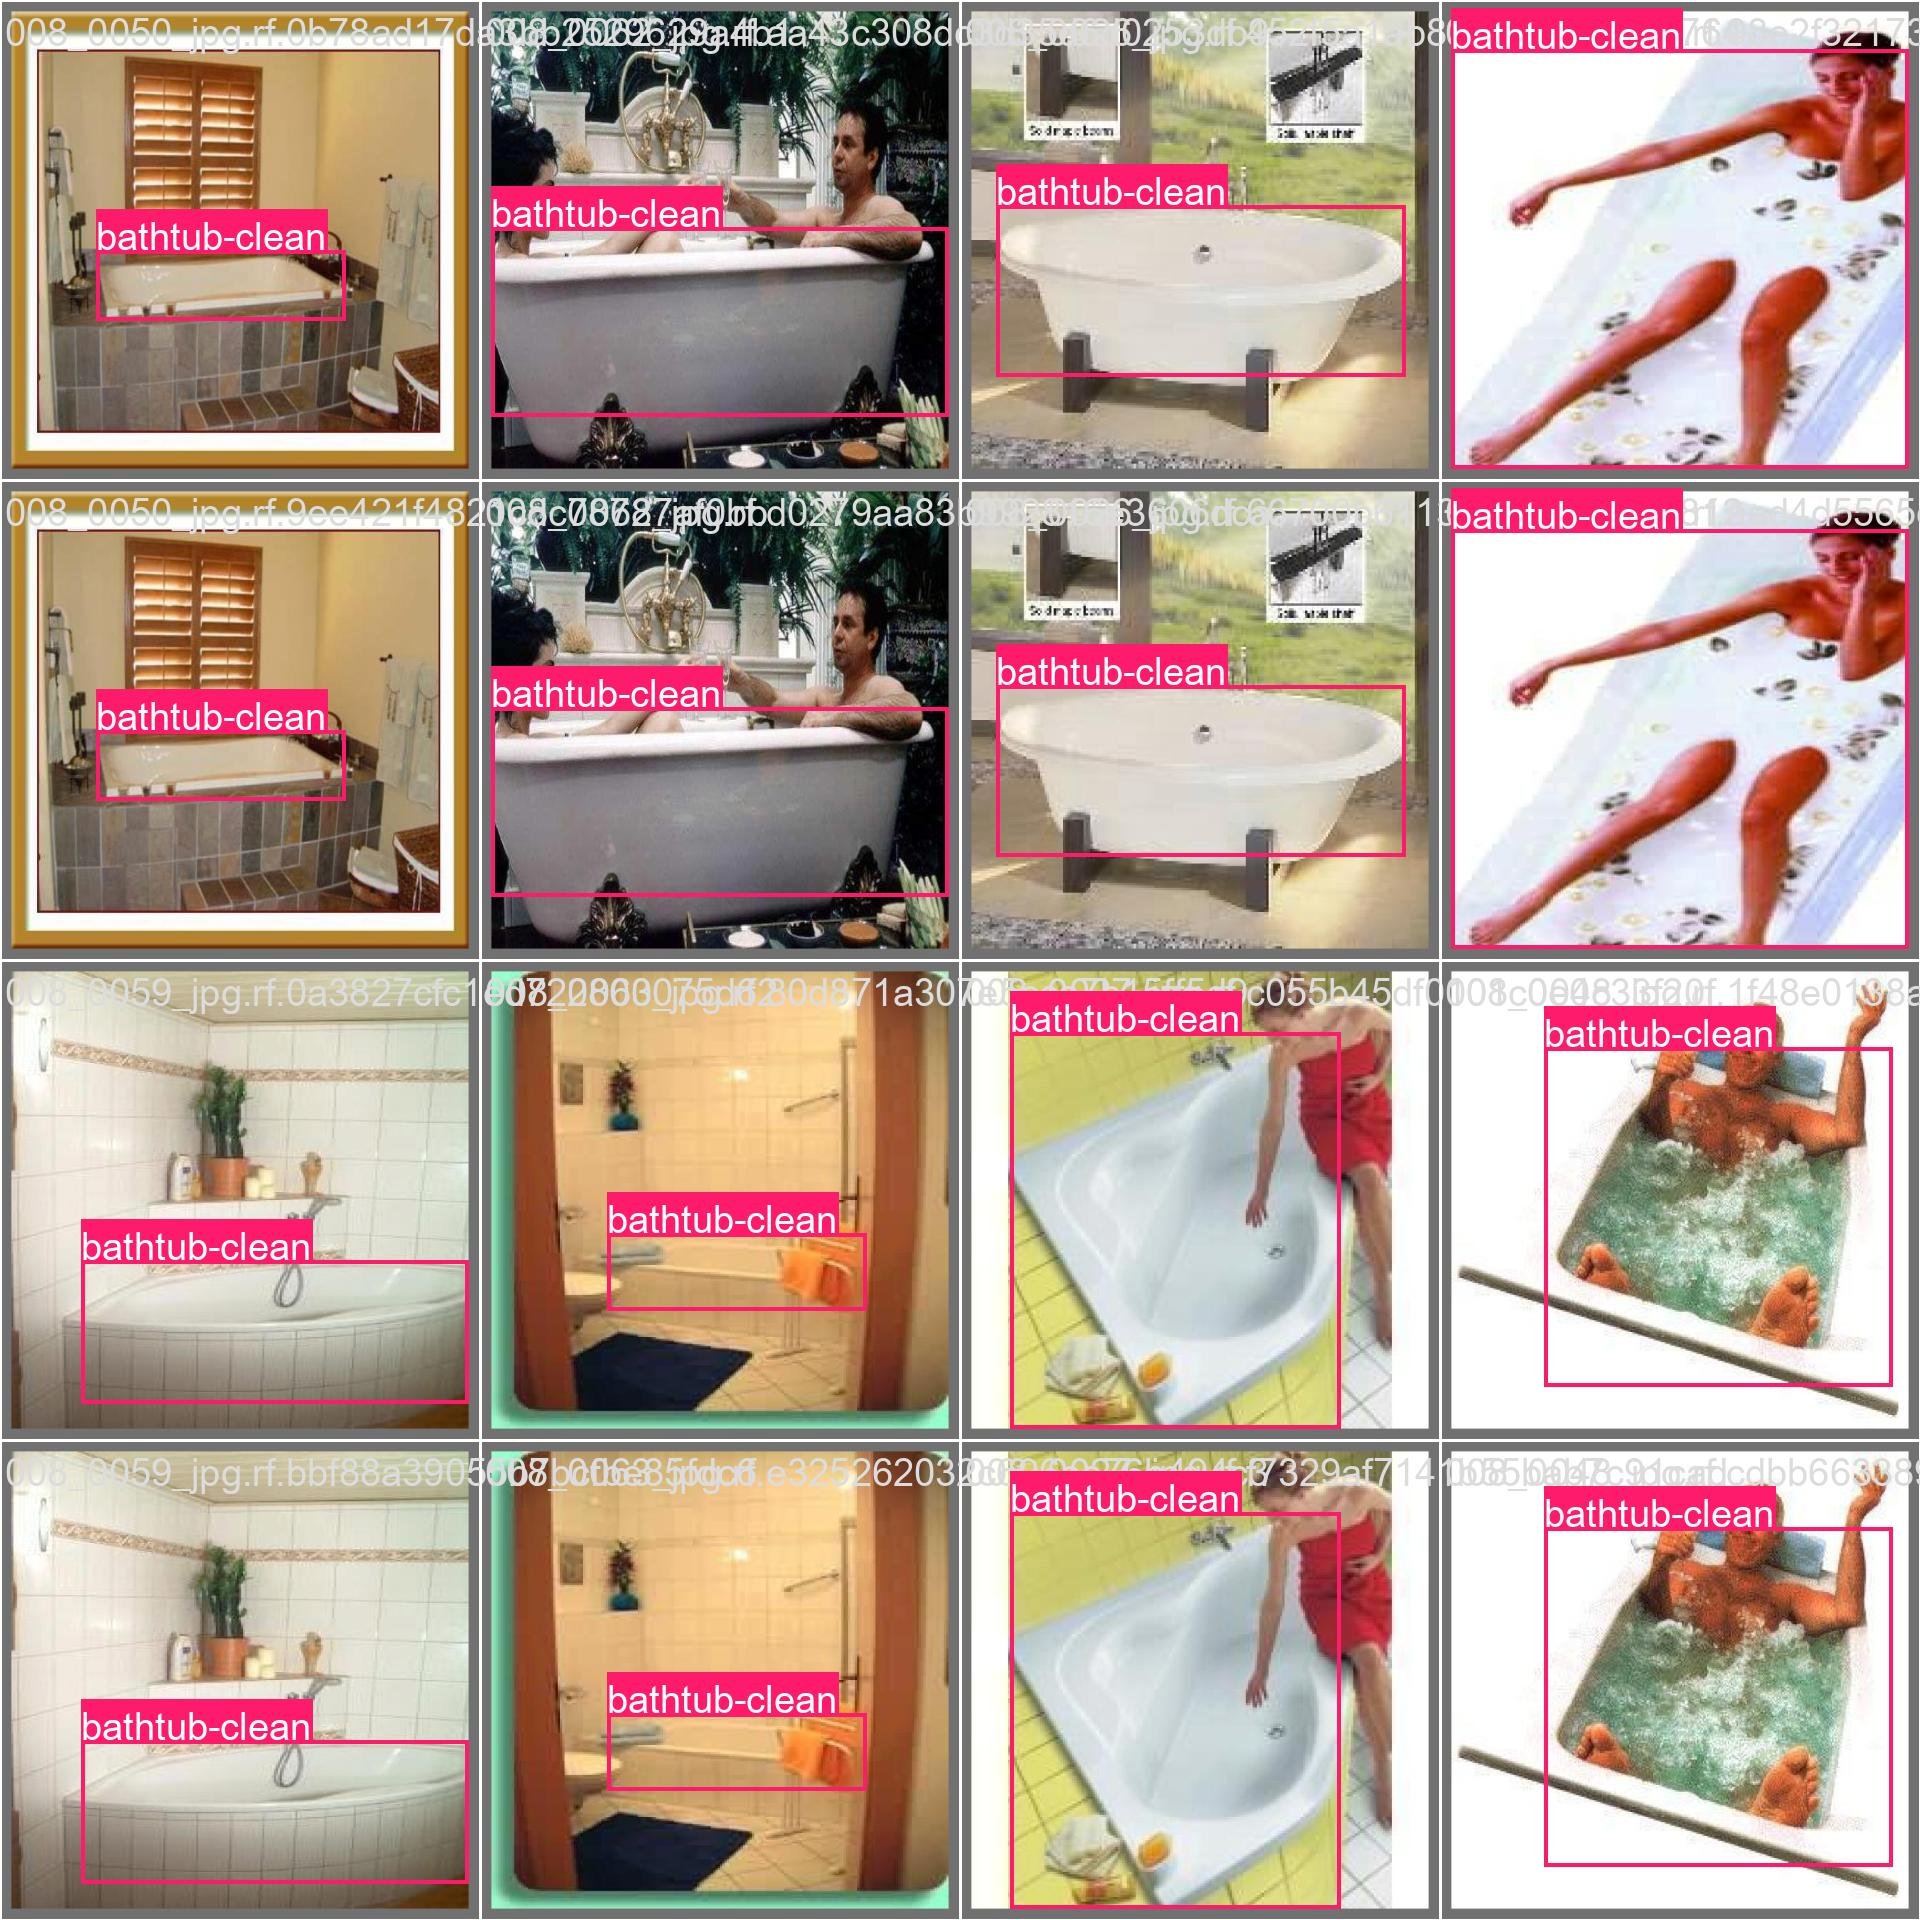

In [12]:
Image(filename=f'/kaggle/working/runs/detect/train/val_batch1_labels.jpg',width=1000)

In [13]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

Ultralytics 8.3.173 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,155,383 parameters, 0 gradients, 28.6 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.7 ms, read: 31.3±4.2 MB/s, size: 35.8 KB)


val: Scanning /kaggle/input/final-ds-reduced-classes/Final_merged_dataset-yaml_cls_reduced_classes/Final_merged_dataset/valid/labels... 2235 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2235/2235 [00:06<00:00, 361.27it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/final-ds-reduced-classes/Final_merged_dataset-yaml_cls_reduced_classes/Final_merged_dataset/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:28<00:00,  4.85it/s]
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2235       6390      0.824      0.776      0.806      0.626
       Air conditioner         17         19      0.971      0.947      0.972      0.847
          Air purifier         33         35      0.932      0.789      0.898      0.787
                  Bowl         64        102      0.938      0.895      0.948      0.747
                 Broom         16         21          1          1      0.995      0.767
                 Brush         13         18      0.947          1      0.995      0.898
                   Cup         19         38          1          1      0.995      0.926
     Cutlery_container         21         30      0.898      0.884      0.952       0.82
               Dustpan         14         19      0.952          1      0.995      0.921
            Egg beater         36         43      0.741      0.732      0.786      0.607
               Blender         41         52      0.737      0.654      0.776      0.488
                Juice

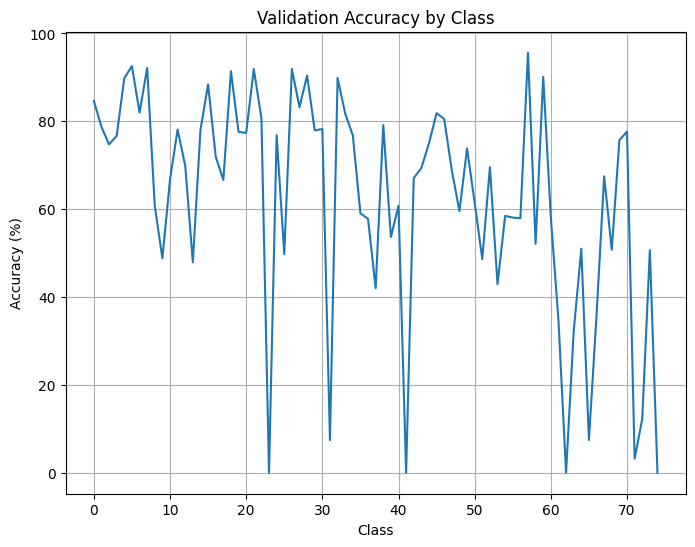

In [14]:
validator = model.val(data='/kaggle/working/Final_merged_dataset/data.yaml', 
                     save=False, 
                     plots=True, 
                     conf=0.25, 
                     iou=0.45)

# Get the validation metrics
box_metrics = validator.box  # Get the detection metrics

# Print the overall validation accuracy
print(f"Validation Accuracy: {box_metrics.mp*100:.2f}%")

# Plot the validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(box_metrics.ap * 100)
plt.title("Validation Accuracy by Class")
plt.xlabel("Class")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

In [15]:
test_validator = model.val(data='/kaggle/working/Final_merged_dataset/data.yaml', 
                          split='test',
                          save=False, 
                          plots=True, 
                          conf=0.25, 
                          iou=0.45)

Ultralytics 8.3.173 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4.1±1.3 MB/s, size: 30.0 KB)


val: Scanning /kaggle/input/final-ds-reduced-classes/Final_merged_dataset-yaml_cls_reduced_classes/Final_merged_dataset/test/labels... 1124 images, 1 backgrounds, 1 corrupt: 100%|██████████| 1124/1124 [00:07<00:00, 144.58it/s]

val: /kaggle/input/final-ds-reduced-classes/Final_merged_dataset-yaml_cls_reduced_classes/Final_merged_dataset/test/images/222708213_jpg.rf.b7bb6974cc86aa61969de38d4b51f9e0.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2671]


WARNING ⚠️ val: Cache directory /kaggle/input/final-ds-reduced-classes/Final_merged_dataset-yaml_cls_reduced_classes/Final_merged_dataset/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:15<00:00,  4.61it/s]
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1123       3094      0.803       0.78      0.804      0.635
       Air conditioner          9         13      0.928      0.923      0.959      0.856
          Air purifier         16         16      0.789      0.938      0.901      0.798
                  Bowl         29         48      0.911      0.848      0.929      0.687
                 Broom          5         10      0.943          1      0.995      0.833
                 Brush          7         11          1          1      0.995      0.908
                   Cup          9         26      0.929          1      0.995      0.952
     Cutlery_container          5         11          1          1      0.995      0.916
               Dustpan          6         10          1          1      0.995      0.939
            Egg beater         18         20       0.76        0.8      0.758      0.432
               Blender         22         26      0.755       0.71      0.798      0.474
                Juice

Test Accuracy: 80.30%


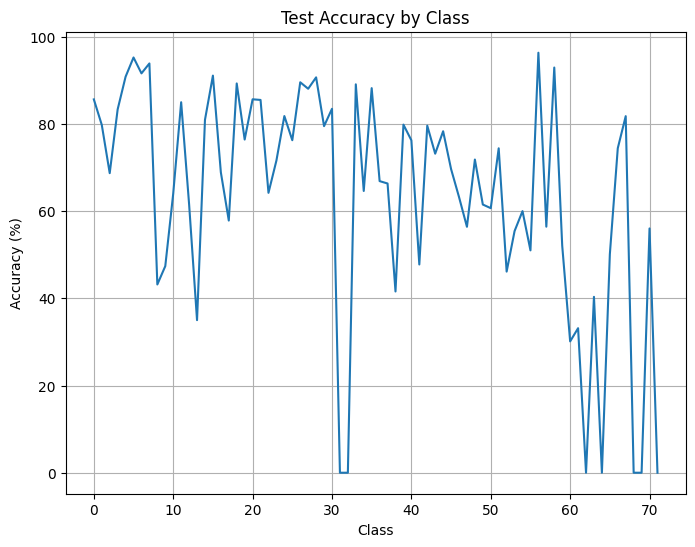

In [16]:
test_metrics = test_validator.box  # Get the detection metrics

# Print the overall test accuracy
print(f"Test Accuracy: {test_metrics.mp*100:.2f}%")

# Plot the per-class test accuracy
plt.figure(figsize=(8, 6))
plt.plot(test_metrics.ap * 100)
plt.title("Test Accuracy by Class")
plt.xlabel("Class")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

In [17]:
!yolo task=detect mode=predict model=/kaggle/input/mrg-dst-best-pt/best.pt conf=0.25 source=/kaggle/input/final-merged-dataset-yaml-cls/Final_merged_dataset/test/images save=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 956, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 79, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 151, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 295, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 1551, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 1449, in torch_safe_load
    ckpt = torch_load(

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg')[100:116]:
      display(Image(filename=image_path, width=500))